<a href="https://colab.research.google.com/github/Rohinkumar1841/LGMVIP-DataScience/blob/main/Irisclassification(_TASK_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Modules

In [4]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df['flower_names'] = df.target.apply(lambda x : iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
from matplotlib import pyplot as plt

In [11]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]


In [12]:
%matplotlib inline

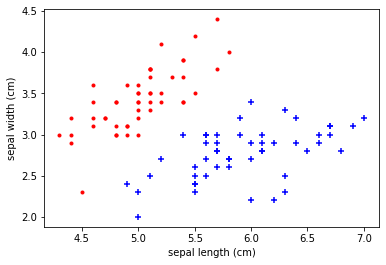

In [13]:
  plt.xlabel('sepal length (cm)')
  plt.ylabel('sepal width (cm)')
  plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color ='red',marker='.')
  plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color ='blue',marker='+')

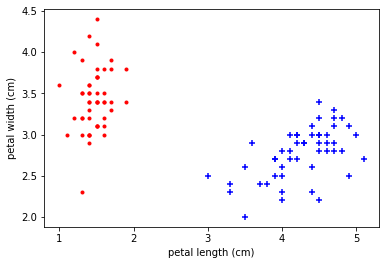

In [14]:
  plt.xlabel('petal length (cm)')
  plt.ylabel('petal width (cm)')
  plt.scatter(df0['petal length (cm)'],df0['sepal width (cm)'],color ='red',marker='.')
  plt.scatter(df1['petal length (cm)'],df1['sepal width (cm)'],color ='blue',marker='+')

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(['target','flower_names'],axis = 'columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y = df.target

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [86]:
len(X_train)

120

In [87]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [88]:
model.fit(X_train,y_train)
print(model.get_params(deep=True) )

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [89]:
model.score(X_test,y_test)

1.0

**Creating KNN **

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [91]:
knn.score(X_test,y_test)

0.9333333333333333

In [92]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  5,  1],
       [ 0,  1, 13]])

Text(42.0, 0.5, 'truth')

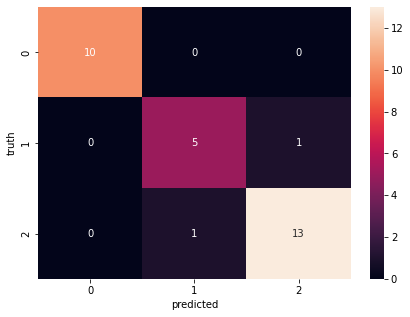

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot = True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      0.83      0.83         6
           2       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30

